(Convulational Neural Networks)
### AUTHORS
[UJJWAL KUMAR ]

[FURAHA DAMIEN ]

### IMPORTS

In [10]:
import sys
import matplotlib.pyplot as plt
import keras 
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam

### Loading CIFAR10 Dataset

In [11]:
def loadDataset():
    (X_TRAIN, Y_TRAIN), (X_TEST , Y_TEST) = cifar10.load_data()
    Y_TRAIN = to_categorical(Y_TRAIN)
    Y_TEST  = to_categorical(Y_TEST)
    return X_TRAIN , Y_TRAIN , X_TEST , Y_TEST

### Normalization

In [12]:
def pixelNormalization(TRAIN , TEST):
    train_normalization = TRAIN.astype('float32')
    test_normalization = TEST.astype('float32')
    train_normalization = train_normalization/255.0 
    test_normalization = test_normalization/255.0
    return train_normalization , test_normalization

# MODELS

#### 1block VGG

In [6]:
def VGG1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

#### 2Block VGG


In [9]:
def VGG2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()   
    return model

#### 3Block VGG

In [10]:
def VGG3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model






#### VGG16

## Different Activation Function for VGG3

### Sigmoid 

In [26]:
def VGG3_Sigmoid():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict_sigmoid():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_Sigmoid()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()
#predicted results for activation = sigmoid

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 305us/step - loss: 2.3086 - accuracy: 0.1010 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 15s 297us/step - loss: 2.3061 - accuracy: 0.0991 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 15s 298us/step - loss: 2.3056 - accuracy: 0.1004 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 15s 298us/step - loss: 2.3057 - accuracy: 0.0998 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 15s 299us/step - loss: 2.3056 - accuracy: 0.0964 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 15s 298us/step - loss: 2.3054 - accuracy: 0.1009 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] 

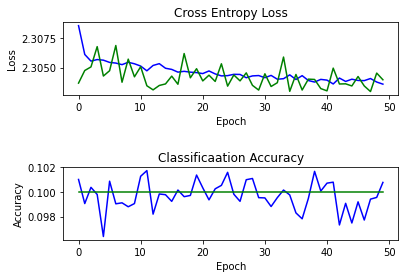

In [27]:
predict_sigmoid()

###  tanh 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.6398 - accuracy: 0.4070 - val_loss: 1.3820 - val_accuracy: 0.5073
Epoch 2/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.2681 - accuracy: 0.5509 - val_loss: 1.1575 - val_accuracy: 0.5894
Epoch 3/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.0892 - accuracy: 0.6208 - val_loss: 1.0430 - val_accuracy: 0.6289
Epoch 4/50
50000/50000 [==============================] - 15s 302us/step - loss: 0.9605 - accuracy: 0.6659 - val_loss: 0.9608 - val_accuracy: 0.6590
Epoch 5/50
50000/50000 [==============================] - 15s 306us/step - loss: 0.8678 - accuracy: 0.7010 - val_loss: 0.9300 - val_accuracy: 0.6774
Epoch 6/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.8012 - accuracy: 0.7232 - val_loss: 0.8889 - val_accuracy: 0.6865
Epoch 7/50
50000/50000 [==============================] 

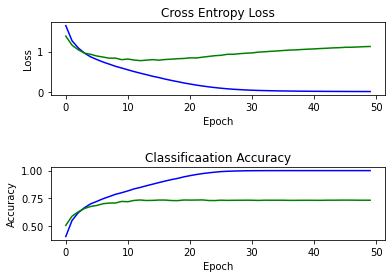

In [28]:
def VGG3_tanh():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='tanh', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict_tanh():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_tanh()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()
#predicted results for activation = sigmoid
predict_tanh()

### elu

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.5319 - accuracy: 0.4546 - val_loss: 1.2442 - val_accuracy: 0.5612
Epoch 2/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.1294 - accuracy: 0.6049 - val_loss: 1.0765 - val_accuracy: 0.6240
Epoch 3/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.9453 - accuracy: 0.6710 - val_loss: 0.9468 - val_accuracy: 0.6738
Epoch 4/50
50000/50000 [==============================] - 15s 305us/step - loss: 0.8306 - accuracy: 0.7130 - val_loss: 0.8882 - val_accuracy: 0.6926
Epoch 5/50
50000/50000 [==============================] - 15s 305us/step - loss: 0.7363 - accuracy: 0.7457 - val_loss: 0.8834 - val_accuracy: 0.6951
Epoch 6/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.6532 - accuracy: 0.7741 - val_loss: 0.8808 - val_accuracy: 0.7019
Epoch 7/50
50000/50000 [==============================] 

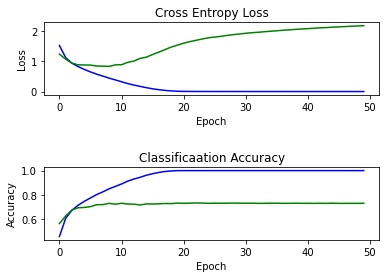

In [29]:
def VGG3_elu():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict_elu():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_elu()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()
#predicted results for activation = sigmoid
predict_elu()

### PREDICTION ON TEST DATASET AND HISTORY PLOT

In [30]:
def predict1():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG1()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()
    
def predict2():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG2()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()
    
def predict3():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________

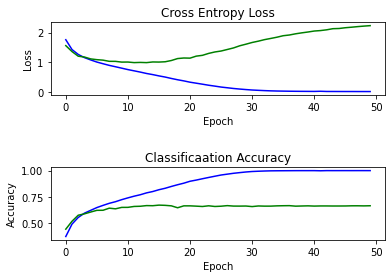

In [31]:
predict1()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)             

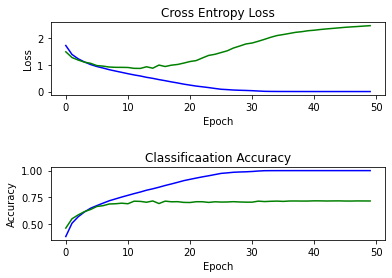

In [32]:
predict2()

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.7809 - accuracy: 0.3569 - val_loss: 1.5321 - val_accuracy: 0.4521
Epoch 2/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.4066 - accuracy: 0.4935 - val_loss: 1.3055 - val_accuracy: 0.5295
Epoch 3/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.2192 - accuracy: 0.5644 - val_loss: 1.1669 - val_accuracy: 0.5854
Epoch 4/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.0898 - accuracy: 0.6140 - val_loss: 1.0434 - val_accuracy: 0.6329
Epoch 5/50
50000/50000 [==============================] - 16s 314us/step - loss: 0.9829 - accuracy: 0.6553 - val_loss: 1.0168 - val_accuracy: 0.6363
Epoch 6/50
50000/50000 [==============================] - 16s 317us/step - loss: 0.8991 - accuracy: 0.6856 - val_loss: 1.0636 - val_accuracy: 0.6292
Epoch 7/50
50000/50000 [==============================] 

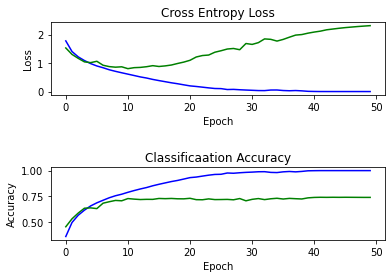

In [33]:
predict3()

## Model Optimization
#### Regularization


#### VGG3 Model with 20% Dropout after max pooling layer and fully connected layer

In [24]:
from keras.layers import Dropout
def VGG3_dropout():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict4():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_dropout()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()

RESULT OF VGG3 MODEL WITH 20% DROPOUT RATE
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.9974 - accuracy: 0.2511 - val_loss: 1.7498 - val_accuracy: 0.3511
Epoch 2/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.6793 - accuracy: 0.3791 - val_loss: 1.5009 - val_accuracy: 0.4493
Epoch 3/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.5351 - accuracy: 0.4378 - val_loss: 1.3778 - val_accuracy: 0.4904
Epoch 4/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.4298 - accuracy: 0.4774 - val_loss: 1.3081 - val_accuracy: 0.5270
Epoch 5/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.3438 - accuracy: 0.5106 - val_loss: 1.2244 - val_accuracy: 0.5565
Epoch 6/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.2617 - accuracy: 0.5458 - val_loss: 1.1444 - val_accuracy: 0.5938
Epoch 7/50
50

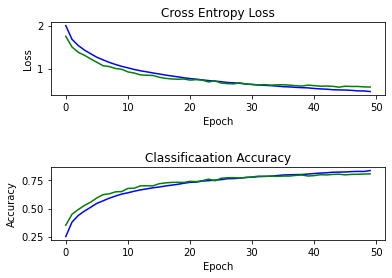

In [25]:
print("RESULT OF VGG3 MODEL WITH 20% DROPOUT RATE")
predict4()

### VGG3 with Weight Decay

In [10]:
from keras.regularizers import l2
def VGG3_weightDecay():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict5():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_weightDecay()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 545us/step - loss: 2.8684 - accuracy: 0.3724 - val_loss: 2.5703 - val_accuracy: 0.4856
Epoch 2/50
50000/50000 [==============================] - 20s 398us/step - loss: 2.4833 - accuracy: 0.5066 - val_loss: 2.3771 - val_accuracy: 0.5404
Epoch 3/50
50000/50000 [==============================] - 20s 392us/step - loss: 2.2926 - accuracy: 0.5699 - val_loss: 2.2715 - val_accuracy: 0.5694
Epoch 4/50
50000/50000 [==============================] - 20s 399us/step - loss: 2.1514 - accuracy: 0.6135 - val_loss: 2.0994 - val_accuracy: 0.6232
Epoch 5/50
50000/50000 [==============================] - 20s 398us/step - loss: 2.0296 - accuracy: 0.6484 - val_loss: 2.0378 - val_accuracy: 0.6375
Epoch 6/50
50000/50000 [==============================] - 21s 410us/step - loss: 1.9251 - accuracy: 0.6782 - val_loss: 1.9

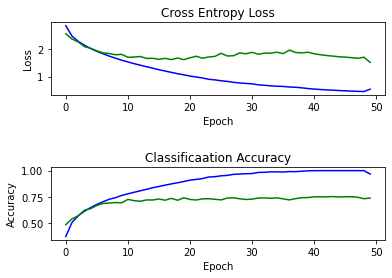

In [11]:
# VGG3 with weight Decay
predict5() 

### VGG3 with DataAugmentation

In [38]:
from keras.preprocessing.image import ImageDataGenerator
def predict6():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3()
    #creating data generator
    data_generator = ImageDataGenerator(width_shift_range=0.1 , height_shift_range=0.1, horizontal_flip= True)
    training = data_generator.flow(X_TRAIN, Y_TRAIN , batch_size = 64)
    steps = int(X_TRAIN.shape[0]/64)
    history = MODEL.fit(training,  steps_per_epoch =steps, epochs=50, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    #learning curve of the model
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()


Epoch 1/50
781/781 [==============================] - 29s 38ms/step - loss: 1.8235 - accuracy: 0.3394 - val_loss: 1.5182 - val_accuracy: 0.4567
Epoch 2/50
781/781 [==============================] - 30s 38ms/step - loss: 1.4912 - accuracy: 0.4623 - val_loss: 1.3816 - val_accuracy: 0.4921
Epoch 3/50
781/781 [==============================] - 30s 39ms/step - loss: 1.3513 - accuracy: 0.5190 - val_loss: 1.2492 - val_accuracy: 0.5585
Epoch 4/50
781/781 [==============================] - 31s 39ms/step - loss: 1.2512 - accuracy: 0.5547 - val_loss: 1.1403 - val_accuracy: 0.6011
Epoch 5/50
781/781 [==============================] - 30s 39ms/step - loss: 1.1672 - accuracy: 0.5880 - val_loss: 1.0869 - val_accuracy: 0.6193
Epoch 6/50
781/781 [==============================] - 30s 39ms/step - loss: 1.1012 - accuracy: 0.6104 - val_loss: 1.0487 - val_accuracy: 0.6346
Epoch 7/50
781/781 [==============================] - 30s 39ms/step - loss: 1.0540 - accuracy: 0.6293 - val_loss: 0.9853 - val_accuracy:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 30s 38ms/step - loss: 0.7690 - accuracy: 0.7319 - val_loss: 0.7607 - val_accuracy: 0.7327
Epoch 17/50
781/781 [==============================] - 30s 38ms/step - loss: 0.7470 - accuracy: 0.7401 - val_loss: 0.8266 - val_accuracy: 0.7173
Epoch 18/50
781/781 [==============================] - 29s 38ms/step - loss: 0.7310 - accuracy: 0.7452 - val_loss: 0.7229 - val_accuracy: 0.7527
Epoch 19/50
781/781 [==============================] - 30s 38ms/step - loss: 0.7104 - accuracy: 0.7513 - val_loss: 0.7094 - val_accuracy: 0.7563
Epoch 20/50
781/781 [==============================] - 29s 37ms/step - loss: 0.6944 - accuracy: 0.7577 - val_loss: 0.7261 - val_accuracy: 0.7474
Epoch 21/50
781/781 [==============================] - 30s 38ms/step - loss: 0.6813 - accuracy: 0.7616 - val_loss: 0.7755 - val_accuracy: 0.7405
Epoch 22/50
781/781 [==============================] - 30s 38ms/step - loss: 0.6679 - accuracy: 0.7650 - val_loss: 0.6921 - val_accuracy: 0.76

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 29s 37ms/step - loss: 0.5595 - accuracy: 0.8039 - val_loss: 0.6387 - val_accuracy: 0.7836
Epoch 32/50
781/781 [==============================] - 29s 38ms/step - loss: 0.5511 - accuracy: 0.8066 - val_loss: 0.6519 - val_accuracy: 0.7828
Epoch 33/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5477 - accuracy: 0.8082 - val_loss: 0.6378 - val_accuracy: 0.7864
Epoch 34/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5343 - accuracy: 0.8136 - val_loss: 0.6405 - val_accuracy: 0.7862
Epoch 35/50
781/781 [==============================] - 30s 39ms/step - loss: 0.5274 - accuracy: 0.8148 - val_loss: 0.6341 - val_accuracy: 0.7855
Epoch 36/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5180 - accuracy: 0.8196 - val_loss: 0.6115 - val_accuracy: 0.7980
Epoch 37/50
781/781 [==============================] - 30s 38ms/step - loss: 0.5111 - accuracy: 0.8226 - val_loss: 0.6316 - val_accuracy: 0.79

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 29s 38ms/step - loss: 0.4479 - accuracy: 0.8429 - val_loss: 0.5948 - val_accuracy: 0.8036
Epoch 47/50
781/781 [==============================] - 30s 38ms/step - loss: 0.4445 - accuracy: 0.8442 - val_loss: 0.5829 - val_accuracy: 0.8099
Epoch 48/50
781/781 [==============================] - 30s 38ms/step - loss: 0.4366 - accuracy: 0.8468 - val_loss: 0.6160 - val_accuracy: 0.8011
Epoch 49/50
781/781 [==============================] - 29s 37ms/step - loss: 0.4308 - accuracy: 0.8478 - val_loss: 0.6174 - val_accuracy: 0.8039
Epoch 50/50
10000/10000 [==============================] - 2s 234us/step
Overall Accuracy on Test Dataset 81.850


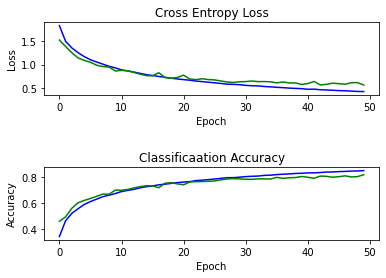

In [39]:
# VGG3 + dataaugmentationi prediciton 
predict6() 

### VGG3 variation of dropout regularization ( dropout rate = 50% ) 

In [40]:

def VGG3_dropout50():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict7():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_dropout50()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 355us/step - loss: 2.3280 - accuracy: 0.1084 - val_loss: 2.2799 - val_accuracy: 0.1790
Epoch 2/50
50000/50000 [==============================] - 17s 337us/step - loss: 2.1856 - accuracy: 0.1829 - val_loss: 2.1360 - val_accuracy: 0.2286
Epoch 3/50
50000/50000 [==============================] - 17s 337us/step - loss: 2.0345 - accuracy: 0.2137 - val_loss: 2.0777 - val_accuracy: 0.2232
Epoch 4/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.9151 - accuracy: 0.2601 - val_loss: 1.8457 - val_accuracy: 0.3200
Epoch 5/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.8229 - accuracy: 0.3051 - val_loss: 1.8600 - val_accuracy: 0.3134
Epoch 6/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.7683 - accuracy: 0.3301 - val_loss: 2.0076 - val_accuracy: 0.2746
Epoch 7/50
50000/50000 [==============================] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50000/50000 [==============================] - 17s 338us/step - loss: 1.2715 - accuracy: 0.5406 - val_loss: 1.1938 - val_accuracy: 0.5664
Epoch 24/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.2549 - accuracy: 0.5484 - val_loss: 1.1789 - val_accuracy: 0.5781
Epoch 25/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.2393 - accuracy: 0.5535 - val_loss: 1.1304 - val_accuracy: 0.5914
Epoch 26/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.2226 - accuracy: 0.5622 - val_loss: 1.1329 - val_accuracy: 0.5935
Epoch 27/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.2061 - accuracy: 0.5698 - val_loss: 1.1562 - val_accuracy: 0.5901
Epoch 28/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.1876 - accuracy: 0.5751 - val_loss: 1.1575 - val_accuracy: 0.5908
Epoch 29/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.1693 - accuracy: 0.5842 - va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50000/50000 [==============================] - 17s 337us/step - loss: 1.0192 - accuracy: 0.6372 - val_loss: 0.9342 - val_accuracy: 0.6663
Epoch 44/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.0150 - accuracy: 0.6387 - val_loss: 0.9014 - val_accuracy: 0.6778
Epoch 45/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.0057 - accuracy: 0.6426 - val_loss: 0.9065 - val_accuracy: 0.6776
Epoch 46/50
50000/50000 [==============================] - 18s 354us/step - loss: 0.9951 - accuracy: 0.6461 - val_loss: 0.8766 - val_accuracy: 0.6807
Epoch 47/50
50000/50000 [==============================] - 17s 349us/step - loss: 0.9879 - accuracy: 0.6499 - val_loss: 0.8767 - val_accuracy: 0.6838
Epoch 48/50
50000/50000 [==============================] - 17s 343us/step - loss: 0.9801 - accuracy: 0.6508 - val_loss: 0.8633 - val_accuracy: 0.6885
Epoch 49/50
50000/50000 [==============================] - 17s 341us/step - loss: 0.9725 - accuracy: 0.6558 - va

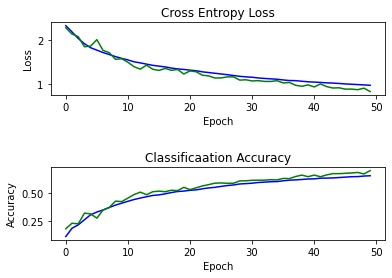

In [41]:
# dropout 50% rate
predict7()

### VGG3  + Dropout + Data Augmentation

In [42]:
# TODO. : change the dropout 20% to best performing data Augmentation
def VGG3_dropout_DataAugmentation():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.summary() 
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict8():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3()
    #creating data generator
    data_generator = ImageDataGenerator(width_shift_range=0.1 , height_shift_range=0.1, horizontal_flip= True)
    training = data_generator.flow(X_TRAIN, Y_TRAIN , batch_size = 64)
    steps = int(X_TRAIN.shape[0]/64)
    history = MODEL.fit(training,  steps_per_epoch =steps, epochs=50, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    #learning curve of the model
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 358us/step - loss: 2.3102 - accuracy: 0.1220 - val_loss: 2.2018 - val_accuracy: 0.2010
Epoch 2/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.1389 - accuracy: 0.2033 - val_loss: 2.0565 - val_accuracy: 0.2651
Epoch 3/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.9930 - accuracy: 0.2439 - val_loss: 1.8641 - val_accuracy: 0.3195
Epoch 4/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.8645 - accuracy: 0.2839 - val_loss: 1.9104 - val_accuracy: 0.2759
Epoch 5/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.7773 - accuracy: 0.3219 - val_loss: 1.8584 - val_accuracy: 0.3068
Epoch 6/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.7188 - accuracy: 0.3458 - val_loss: 1.8037 - val_accuracy: 0.3388
Epoch 7/50
50000/50000 [==============================] 

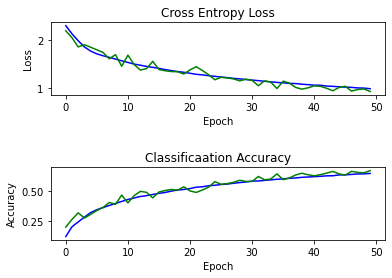

In [43]:
# VGG3 with dropout rate = x%  + Data Augmentation
predict7()

### Variable Dropout Rate and Data Augmentation and Batch Normalization

In [17]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
def VGG3_droput_DataAugmentaton_BatchNormalization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict9():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_droput_DataAugmentaton_BatchNormalization()
    #creating data generator
    data_generator = ImageDataGenerator(width_shift_range=0.1 , height_shift_range=0.1, horizontal_flip= True)
    training = data_generator.flow(X_TRAIN, Y_TRAIN , batch_size = 64)
    steps = int(X_TRAIN.shape[0]/64)
    history = MODEL.fit(training,  steps_per_epoch =steps, epochs=200, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    #learning curve of the model
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()


Epoch 1/200
781/781 [==============================] - 34s 44ms/step - loss: 2.1184 - accuracy: 0.2984 - val_loss: 1.6508 - val_accuracy: 0.4079
Epoch 2/200
781/781 [==============================] - 32s 41ms/step - loss: 1.6257 - accuracy: 0.4040 - val_loss: 1.5140 - val_accuracy: 0.4475
Epoch 3/200
781/781 [==============================] - 32s 41ms/step - loss: 1.4823 - accuracy: 0.4585 - val_loss: 1.3513 - val_accuracy: 0.5182
Epoch 4/200
781/781 [==============================] - 32s 41ms/step - loss: 1.3961 - accuracy: 0.4925 - val_loss: 1.4734 - val_accuracy: 0.4739
Epoch 5/200
781/781 [==============================] - 32s 41ms/step - loss: 1.3152 - accuracy: 0.5240 - val_loss: 1.3217 - val_accuracy: 0.5311
Epoch 6/200
781/781 [==============================] - 32s 41ms/step - loss: 1.2652 - accuracy: 0.5437 - val_loss: 1.2501 - val_accuracy: 0.5458
Epoch 7/200
781/781 [==============================] - 33s 42ms/step - loss: 1.2235 - accuracy: 0.5626 - val_loss: 1.1019 - val_a

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 29s 38ms/step - loss: 0.4954 - accuracy: 0.8307 - val_loss: 0.4472 - val_accuracy: 0.8468
Epoch 123/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4907 - accuracy: 0.8327 - val_loss: 0.4831 - val_accuracy: 0.8360
Epoch 124/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4890 - accuracy: 0.8338 - val_loss: 0.4702 - val_accuracy: 0.8433
Epoch 125/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4932 - accuracy: 0.8316 - val_loss: 0.4645 - val_accuracy: 0.8426
Epoch 126/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4888 - accuracy: 0.8330 - val_loss: 0.4625 - val_accuracy: 0.8415
Epoch 127/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4882 - accuracy: 0.8319 - val_loss: 0.4366 - val_accuracy: 0.8529
Epoch 128/200
781/781 [==============================] - 29s 38ms/step - loss: 0.4876 - accuracy: 0.8329 - val_loss: 0.4524 - val_ac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 29s 37ms/step - loss: 0.4622 - accuracy: 0.8406 - val_loss: 0.4060 - val_accuracy: 0.8625
Epoch 142/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4645 - accuracy: 0.8412 - val_loss: 0.4351 - val_accuracy: 0.8552
Epoch 143/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4667 - accuracy: 0.8414 - val_loss: 0.4420 - val_accuracy: 0.8493
Epoch 144/200
781/781 [==============================] - 29s 38ms/step - loss: 0.4585 - accuracy: 0.8436 - val_loss: 0.4611 - val_accuracy: 0.8424
Epoch 145/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4608 - accuracy: 0.8413 - val_loss: 0.4669 - val_accuracy: 0.8417
Epoch 146/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4533 - accuracy: 0.8452 - val_loss: 0.4476 - val_accuracy: 0.8497
Epoch 147/200
781/781 [==============================] - 30s 38ms/step - loss: 0.4565 - accuracy: 0.8430 - val_loss: 0.4485 - val_ac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 29s 37ms/step - loss: 0.4376 - accuracy: 0.8503 - val_loss: 0.4119 - val_accuracy: 0.8583
Epoch 162/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4418 - accuracy: 0.8487 - val_loss: 0.4081 - val_accuracy: 0.8613
Epoch 163/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4363 - accuracy: 0.8517 - val_loss: 0.4005 - val_accuracy: 0.8640
Epoch 164/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4355 - accuracy: 0.8509 - val_loss: 0.4026 - val_accuracy: 0.8638
Epoch 165/200
781/781 [==============================] - 30s 39ms/step - loss: 0.4381 - accuracy: 0.8497 - val_loss: 0.4218 - val_accuracy: 0.8591
Epoch 166/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4381 - accuracy: 0.8492 - val_loss: 0.4196 - val_accuracy: 0.8606
Epoch 167/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4324 - accuracy: 0.8515 - val_loss: 0.4214 - val_ac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 29s 37ms/step - loss: 0.4205 - accuracy: 0.8561 - val_loss: 0.4075 - val_accuracy: 0.8669
Epoch 182/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4137 - accuracy: 0.8585 - val_loss: 0.3957 - val_accuracy: 0.8661
Epoch 183/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4149 - accuracy: 0.8587 - val_loss: 0.3947 - val_accuracy: 0.8672
Epoch 184/200
781/781 [==============================] - 29s 37ms/step - loss: 0.4169 - accuracy: 0.8587 - val_loss: 0.4058 - val_accuracy: 0.8612
Epoch 185/200
781/781 [==============================] - 29s 38ms/step - loss: 0.4137 - accuracy: 0.8594 - val_loss: 0.4220 - val_accuracy: 0.8589
Epoch 186/200
781/781 [==============================] - 30s 38ms/step - loss: 0.4121 - accuracy: 0.8589 - val_loss: 0.4021 - val_accuracy: 0.8653
Epoch 187/200
781/781 [==============================] - 30s 38ms/step - loss: 0.4116 - accuracy: 0.8591 - val_loss: 0.3968 - val_ac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



10000/10000 [==============================] - 2s 237us/step
Overall Accuracy on Test Dataset 87.060


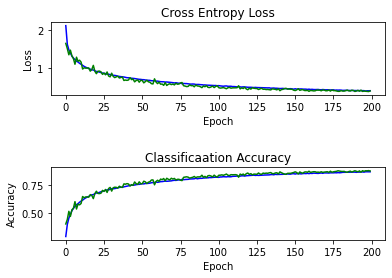

In [18]:
predict9()

### Variable Dropout Rate

In [12]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
def VGG3_dropoutV():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def predict10():
    X_TRAIN , Y_TRAIN , X_TEST , Y_TEST =  loadDataset()
    X_TRAIN , X_TEST = pixelNormalization(X_TRAIN , X_TEST)
    MODEL = VGG3_dropoutV()
    history = MODEL.fit(X_TRAIN , Y_TRAIN, epochs=50, batch_size=64, validation_data=(X_TEST,Y_TEST),verbose=1)
    _ , accuracy = MODEL.evaluate(X_TEST, Y_TEST , verbose = 1)
    print("Overall Accuracy on Test Dataset %.3f"%(accuracy*100))
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history['loss'], color='blue', label ='TRAIN')
    plt.plot(history.history['val_loss'], color = 'green', label ='TEST')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.subplot(212)
    plt.title("Classificaation Accuracy")
    plt.plot(history.history['accuracy'], color='blue', label='TRAIN')
    plt.plot(history.history['val_accuracy'], color='green', label='TEST')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplots_adjust(hspace=1.0)
    plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 351us/step - loss: 2.2463 - accuracy: 0.1445 - val_loss: 2.0603 - val_accuracy: 0.2611
Epoch 2/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.9395 - accuracy: 0.2644 - val_loss: 1.6882 - val_accuracy: 0.3781
Epoch 3/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.7473 - accuracy: 0.3387 - val_loss: 1.6349 - val_accuracy: 0.3944
Epoch 4/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.6568 - accuracy: 0.3806 - val_loss: 1.5274 - val_accuracy: 0.4405
Epoch 5/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.5675 - accuracy: 0.4159 - val_loss: 1.4229 - val_accuracy: 0.4854
Epoch 6/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.5085 - accuracy: 0.4425 - val_loss: 1.3620 - val_accuracy: 0.5078
Epoch 7/50
50000/50000 [==============================] 

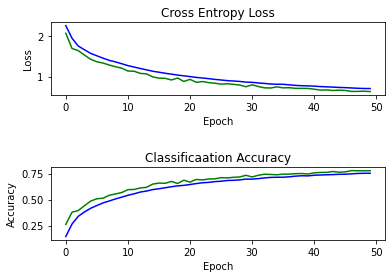

In [13]:
predict10()